## Análise comparativa e Preditiva NBA

***Aqui analisaremos as estísticas principais da temporada 2019-20 da NBA, liga Norte Americana de Basquete, criando relações e seus impactos para distinção entre os melhores jogadores da competição, permitindo assim a modelagem dos melhores jogadores da atual temporada 2020-21***

**Para se familiarizar com alguns dos termos usados aqui, recomenda-se a leitura em:**

https://www.basketball-reference.com/about/glossary.html#:~:text=GmSc%20-%20Game%20Score%3B%20the%20formula,productivity%20for%20a%20single%20game.

#### Importando bibliotecas para análises 

In [522]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

#### Importando base de dados com stats de 2019-2020

In [505]:
dados = pd.read_csv('base_10.csv',sep=',',encoding='cp437')
dados=dados.rename({'Unnamed: 0':'Player_id'},axis=1)
dados

,Player_id,player,pos,age,tm,g,gs,mp,fg,fga,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,year
0,1,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9,2019-20
1,2,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7,2019-20
2,3,Al-Farouq Aminu,PF,29,ORL,18,2,21.1,1.4,4.8,...,1.3,3.5,4.8,1.2,1.0,0.4,0.9,1.5,4.3,2019-20
3,4,Kyle Anderson,SF,26,MEM,67,28,19.9,2.3,4.9,...,0.9,3.4,4.3,2.4,0.8,0.6,1.0,1.7,5.8,2019-20
4,5,Giannis Antetokounmpo,PF,25,MIL,63,63,30.4,10.9,19.7,...,2.2,11.4,13.6,5.6,1.0,1.0,3.7,3.1,29.5,2019-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,339,Christian Wood,PF,24,DET,62,12,21.4,4.6,8.2,...,1.7,4.6,6.3,1.0,0.5,0.9,1.4,1.6,13.1,2019-20
339,340,Delon Wright,PG,27,DAL,73,5,21.5,2.6,5.6,...,1.0,2.9,3.8,3.3,1.2,0.3,1.0,1.3,6.9,2019-20
340,341,Thaddeus Young,PF,31,CHI,64,16,24.9,4.2,9.4,...,1.5,3.5,4.9,1.8,1.4,0.4,1.6,2.1,10.3,2019-20
341,342,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,...,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6,2019-20


#### Importando base de dados com stats de 2020-2021 e padronizando-a em relação a de 2019-2020

In [481]:
comp = pd.read_csv('2020_21.csv',encoding='cp437')
comp.columns = dados.drop(['year'],axis=1).columns

#### Importando base de dados com o top 100 de melhores jogadores baseado na estatística de Game Score

$$GameScore = PTS+0.4xFG-0.7xFGA-0.4x(FTA-FT)+0.7xORB+0.3xDRB+STL+0.7xAST+0.7xBLK-0.4xPF-TOV$$

*O game Score foi criado por John Hollinger para dar uma métrica mais adequada da produtividade de um jogador por cada jogo, mesclando assim estatísicas de ataque, defesa, efetividade e quantidade.*

In [506]:
top_100= pd.read_excel('top_100_real.xlsx',sheet_name='GmSc36')
top_25=top_100.head(25)
top_50_25=top_100.iloc[25:50,:]
top_75_50=top_100.iloc[50:75,:]
top_100_75=top_100.iloc[75:100,:]
top_200_100=top_100.iloc[100:200,:]
top_300_200=top_100.iloc[200:,:]

In [507]:
def ranking(name):
    if name in top_25['Player'].tolist():
        return 1
    elif name in top_50_25['Player'].tolist():
        return 2
    elif name in top_75_50['Player'].tolist():
        return 3
    elif name in top_100_75['Player'].tolist():
        return 4
    elif name in top_200_100['Player'].tolist():
        return 5
    elif name in top_300_200['Player'].tolist():
        return 6
    return 0

def tier(ranking):
    if ranking in [1,2,3,4]:
        return 100
    elif ranking==5:
        return 200
    elif ranking==6:
        return 300
    else:
        return 400

In [508]:
dados['ranking']=dados.player.apply(ranking)
dados['tier']=dados.ranking.apply(tier)

In [516]:
dados['game_score']=dados.pts +0.4*dados.fg -0.7*dados.fga -0.4*(dados.fta-dados.ft)+0.7*dados.orb+0.3*dados.drb +dados.stl+0.7*dados.ast+0.7*dados.blk-0.4*dados.pf-dados.tov

#### Utilizando a classificação Forbes para os tiers dos jogadores, isto é, Top 100, Top 200, Top 300 e Top 400

In [486]:
tier_1=dados[dados['tier']==100]
tier_2=dados[dados['tier']==200]
tier_3=dados[dados['tier']==300]
tier_4=dados[dados['tier']==400]

## Entendendo relações entre variáveis e associações que justifiquem o rendimento dos jogadores

##### Arremessos Efetivos

- Analisaremos o fato da tentativa de arremessos por acerto efetivo de arremesso e comparar isso ao fato do tier de qual os jogadore pertencem e averiguar assim se existe alguma relação

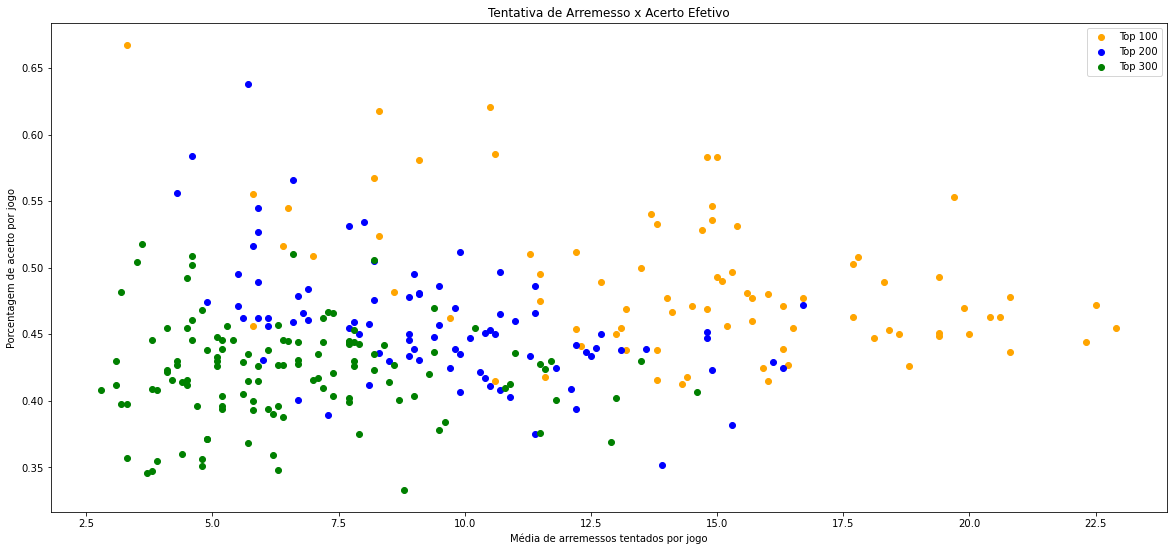

In [509]:
plt.figure(figsize=(20,9))
plt.scatter(tier_1.fga,tier_1.fgpct,color='orange',label='Top 100')
plt.scatter(tier_2.fga,tier_2.fgpct,color='blue',label='Top 200')
plt.scatter(tier_3.fga,tier_3.fgpct,color='green',label='Top 300')
plt.xlabel('Média de arremessos tentados por jogo')
plt.legend()
plt.ylabel('Porcentagem de acerto por jogo')
plt.title('Tentativa de Arremesso x Acerto Efetivo')
plt.show()

Como pode-se ver, os jogadores colocados como top 100, são aqueles que mais arriscam e conseguem ter em médias acertos acima de 45%, o que aumenta sua influência em jogo provavelmente, tal qual pela responsabilidade que devem ter em quadra, sendo referências.

##### Arremessos x Pontos por partida

- É valida também a confirmação do fato de que os melhores atletas, são aqueles que além de arremessar mais por jogo, também são aqueles que mais fazem pontos.

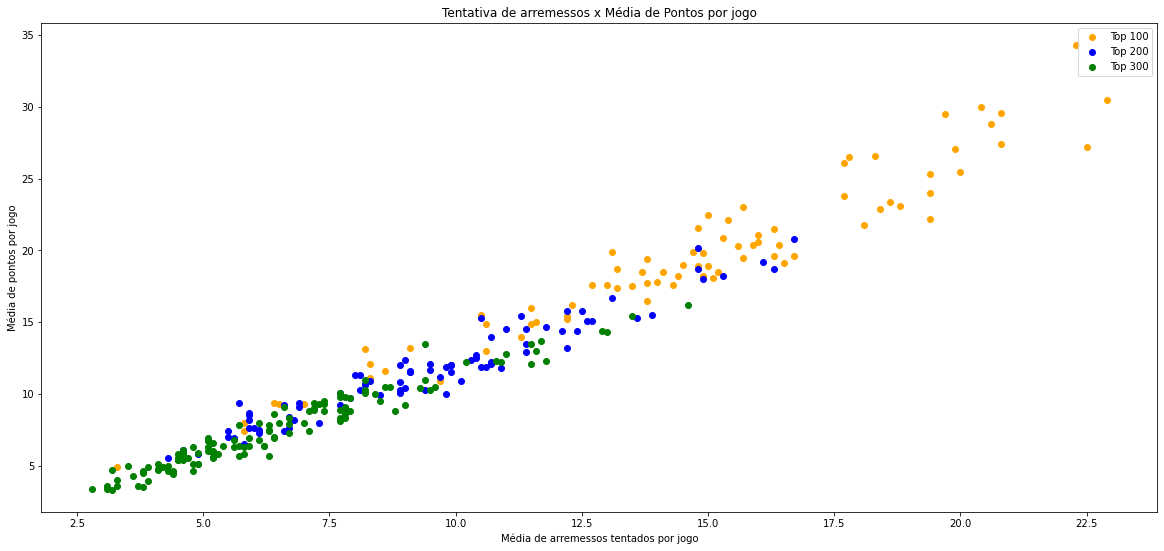

In [510]:
plt.figure(figsize=(20,9))
plt.scatter(tier_1.fga,tier_1.pts,color='orange',label='Top 100')
plt.scatter(tier_2.fga,tier_2.pts,color='blue',label='Top 200')
plt.scatter(tier_3.fga,tier_3.pts,color='green',label='Top 300')
plt.xlabel('Média de arremessos tentados por jogo')
plt.legend()
plt.ylabel('Média de pontos por jogo')
plt.title('Tentativa de arremessos x Média de Pontos por jogo')
plt.show()

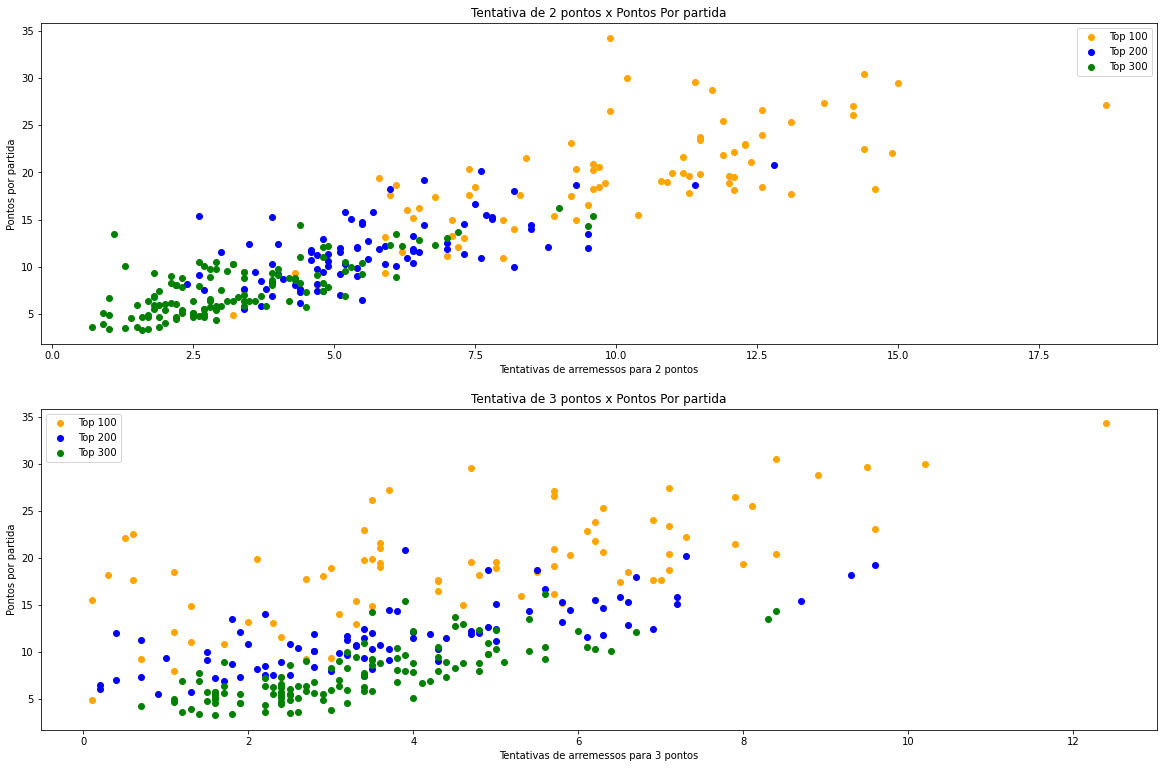

In [531]:
plt.figure(figsize=(20,13))
plt.subplot(211)
plt.scatter(tier_1.pa_2,tier_1.pts,color='orange',label='Top 100')
plt.scatter(tier_2.pa_2,tier_2.pts,color='blue',label='Top 200')
plt.scatter(tier_3.pa_2,tier_3.pts,color='green',label='Top 300')
plt.xlabel('Tentativas de arremessos para 2 pontos')
plt.legend()
plt.ylabel('Pontos por partida')
plt.title('Tentativa de 2 pontos x Pontos Por partida')

plt.subplot(212)
plt.scatter(tier_1.pa_3,tier_1.pts,color='orange',label='Top 100')
plt.scatter(tier_2.pa_3,tier_2.pts,color='blue',label='Top 200')
plt.scatter(tier_3.pa_3,tier_3.pts,color='green',label='Top 300')
plt.xlabel('Tentativas de arremessos para 3 pontos')
plt.legend()
plt.ylabel('Pontos por partida')
plt.title('Tentativa de 3 pontos x Pontos Por partida')
plt.show()

Nota-se pelos gráficos acima, que basicamente todos os jogadores na parte superior direita do gráfico, pertencem ao top 100, sugerindo que além de ter mais responsabilidade por lançarem mais bolas à cesta, também são os que mais fazem pontos por suas equipes.

#### Posição x Fundamento

- Vale se considerar a existência de algumas estatísticas do esporte em relação à posição que o atleta atua e assim considerar se pode ser um fator importante para análise acerca dos melhores atletas.

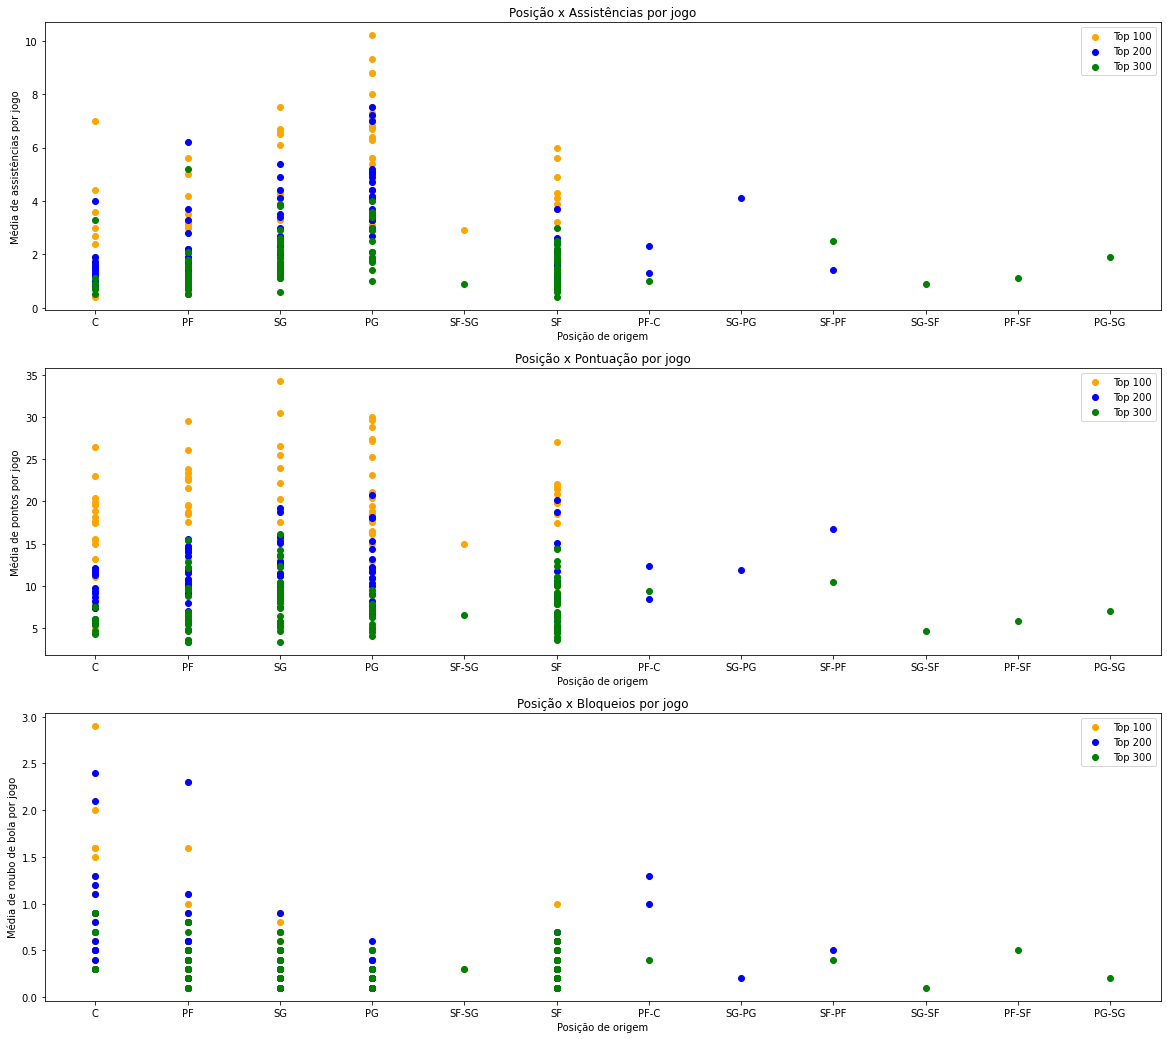

In [530]:
plt.figure(figsize=(20,18))
plt.subplot(311)
plt.scatter(tier_1.pos,tier_1.ast,color='orange',label='Top 100')
plt.scatter(tier_2.pos,tier_2.ast,color='blue',label='Top 200')
plt.scatter(tier_3.pos,tier_3.ast,color='green',label='Top 300')
plt.xlabel('Posição de origem')
plt.legend()
plt.ylabel('Média de assistências por jogo')
plt.title('Posição x Assistências por jogo')

plt.subplot(312)
plt.scatter(tier_1.pos,tier_1.pts,color='orange',label='Top 100')
plt.scatter(tier_2.pos,tier_2.pts,color='blue',label='Top 200')
plt.scatter(tier_3.pos,tier_3.pts,color='green',label='Top 300')
plt.xlabel('Posição de origem')
plt.legend()
plt.ylabel('Média de pontos por jogo')
plt.title('Posição x Pontuação por jogo')

plt.subplot(313)
plt.scatter(tier_1.pos,tier_1.blk,color='orange',label='Top 100')
plt.scatter(tier_2.pos,tier_2.blk,color='blue',label='Top 200')
plt.scatter(tier_3.pos,tier_3.blk,color='green',label='Top 300')
plt.xlabel('Posição de origem')
plt.legend()
plt.ylabel('Média de roubo de bola por jogo')
plt.title('Posição x Bloqueios por jogo')
plt.show()

Analisando o gráfico, é possível de se ver que os atletas na posição de **PG** ou **Armador** são os maiores responsáveis por assistências em um jogo, e que independente da posição, aqueles considerados do top 100, também lideram esse quesito. 

Já no âmbito da pontuação, vê-se um equilíbrio maior, tendendo um pouco mais para a posição de **SG** ou **Ala Armador**, e novamente ressalta-se que os atletas do top 100 se destacam, provando ainda mais o tópico da classificação.

Finalizando, analisa-se uma das posições mais importantes no aspecto defensivo, conforme se utiliza a variável de bloqueios durate o jogo. Conforme se analisa o terceiro gráfico, vê-se que a posição de **Center** ou **Pivô** é dominante nesse fundamento, e neste jogadores do segundo escalão, top 200, também se destacam

#### Ataque x Defesa

- Compara-se se um atleta é considerado dentro do top 100, qual a chance de ele ser efetivo tanto no ataque quanto na defesa? Veremos isso comparando as variáveis abaixo.

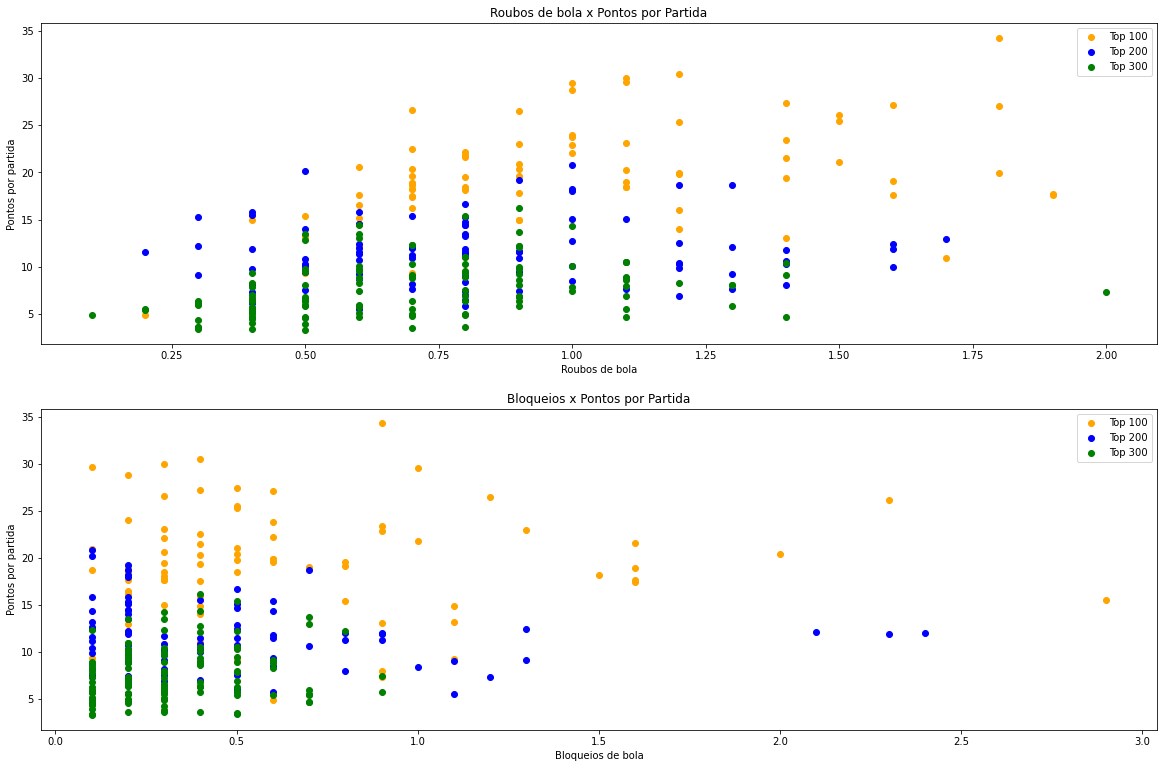

In [512]:
plt.figure(figsize=(20,13))
plt.subplot(211)
plt.scatter(tier_1.stl,tier_1.pts,color='orange',label='Top 100')
plt.scatter(tier_2.stl,tier_2.pts,color='blue',label='Top 200')
plt.scatter(tier_3.stl,tier_3.pts,color='green',label='Top 300')
plt.xlabel('Roubos de bola')
plt.legend()
plt.ylabel('Pontos por partida')
plt.title('Roubos de bola x Pontos por Partida')

plt.subplot(212)
plt.scatter(tier_1.blk,tier_1.pts,color='orange',label='Top 100')
plt.scatter(tier_2.blk,tier_2.pts,color='blue',label='Top 200')
plt.scatter(tier_3.blk,tier_3.pts,color='green',label='Top 300')
plt.xlabel('Bloqueios de bola')
plt.legend()
plt.ylabel('Pontos por partida')
plt.title('Bloqueios x Pontos por Partida')
plt.show()

*Como pode-se ver, grande parte do TOP 100, se localiza na parte superior direita do gráfico de roubo de bola x Pontos, mostrando que estes tem participação efetiva em ambas situações do jogo*.

#### Time x Atributo

**Na NBA, a montagem de um elenco, se pauta sobretudo no equílibrio entre as peças. Dessa forma, e com as análises feitas antes, veremos como as equipes tem suas peças estabelecidas e tentar supor por que algumas funcionaram e chegaram as fases finais e outras não**.

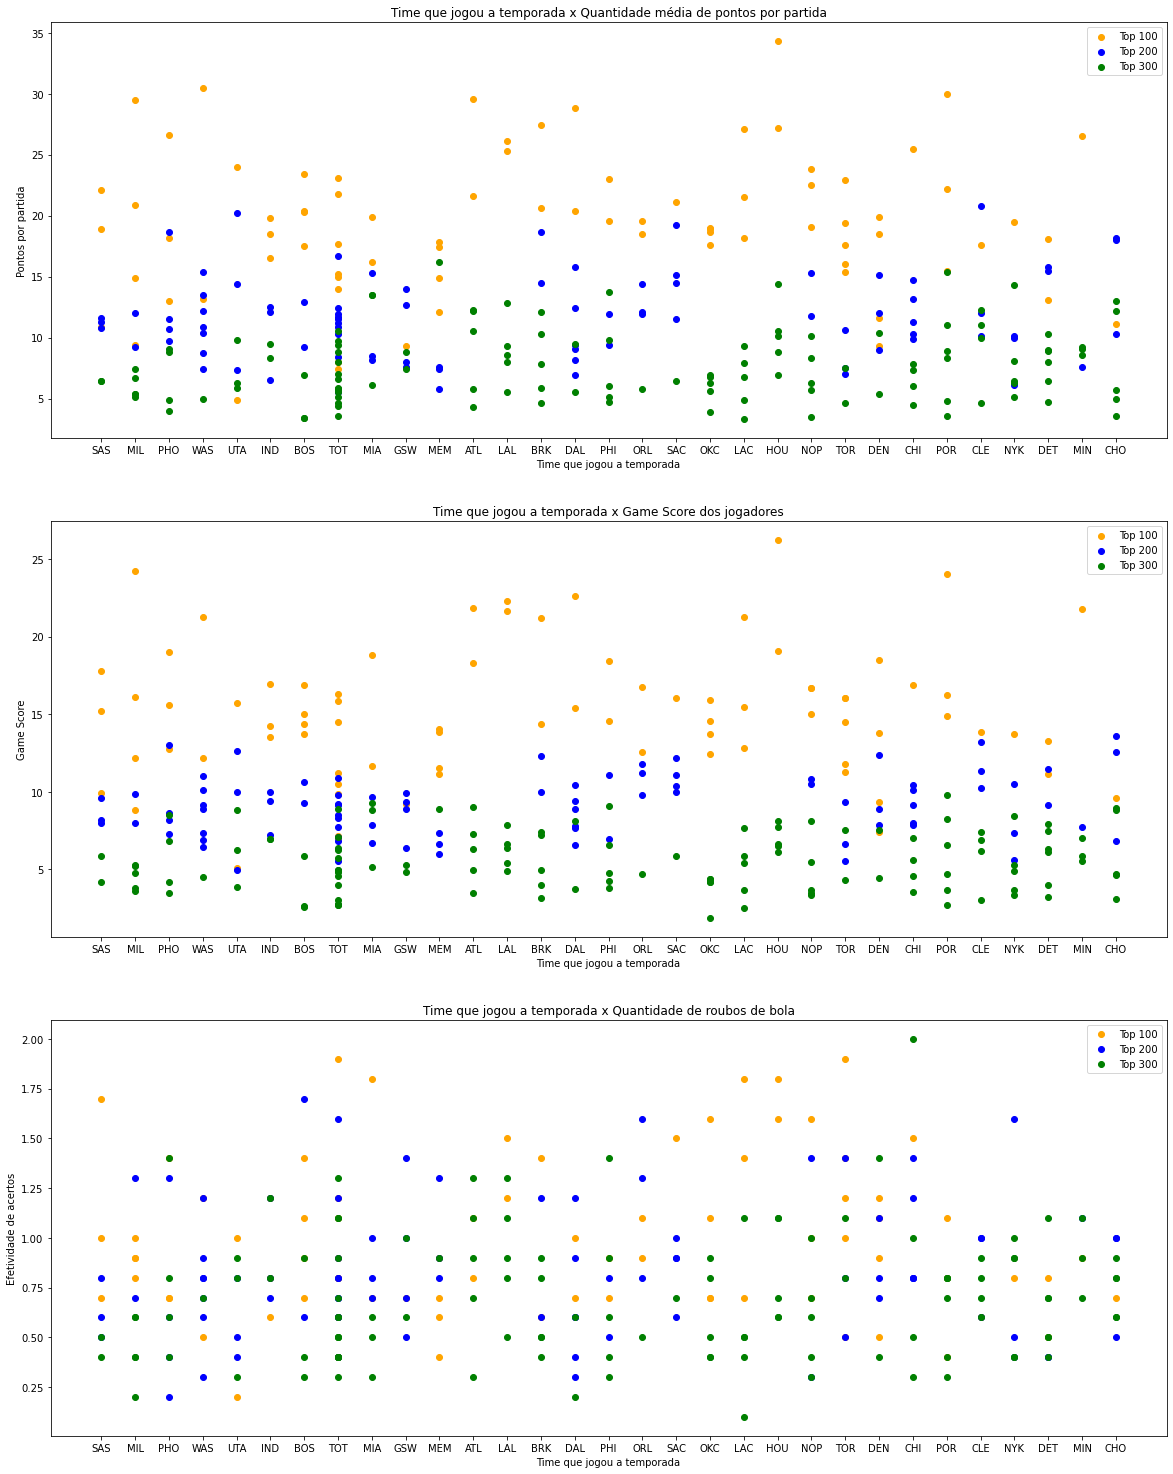

In [514]:
plt.figure(figsize=(20,26))
plt.subplot(311)
plt.scatter(tier_1.tm,tier_1.pts,color='orange',label='Top 100')
plt.scatter(tier_2.tm,tier_2.pts,color='blue',label='Top 200')
plt.scatter(tier_3.tm,tier_3.pts,color='green',label='Top 300')
plt.xlabel('Time que jogou a temporada')
plt.legend()
plt.ylabel('Pontos por partida')
plt.title('Time que jogou a temporada x Quantidade média de pontos por partida')

plt.subplot(312)
plt.scatter(tier_1.tm,tier_1.game_score,color='orange',label='Top 100')
plt.scatter(tier_2.tm,tier_2.game_score,color='blue',label='Top 200')
plt.scatter(tier_3.tm,tier_3.game_score,color='green',label='Top 300')
plt.xlabel('Time que jogou a temporada')
plt.legend()
plt.ylabel('Game Score')
plt.title('Time que jogou a temporada x Game Score dos jogadores')

plt.subplot(313)
plt.scatter(tier_1.tm,tier_1.stl,color='orange',label='Top 100')
plt.scatter(tier_2.tm,tier_2.stl,color='blue',label='Top 200')
plt.scatter(tier_3.tm,tier_3.stl,color='green',label='Top 300')
plt.xlabel('Time que jogou a temporada')
plt.legend()
plt.ylabel('Efetividade de acertos')
plt.title('Time que jogou a temporada x Quantidade de roubos de bola')
plt.show()

*Como pode-se ver claramente, times que optaram por jogadores mais efetivos e equilibrados em aspectos práticos do jogo, conseguiram melhores resultados, do que aqueles que por vezes tentaram investir em somente  um jogador "All-star" que mesmo com números estratosféricos, como o caso de Houston, o encaixe com o resto da equipe não foi ideal. Times como Lakers, Miami e Clippers conseguiram encaixes mais homogêneos entre suas peças, conseguindo intervalos menores entre as estatísticas e times mais compactos e equilibrados, o que acabou por influenciar diretamente em seu desempenho*.

#### Histograma do Game Score x Tier

- Por fim, vale a análise da frequência relativa de cada jogador em relação ao seu game score, separados por seus tiers, isto é, em qual top este está rankeado, dessa forma, será possível observar se os jogadores considerados do top 100, por exemplo estarão com game Score acima da média, e o do top 300, abaixo ou parecido com a média.

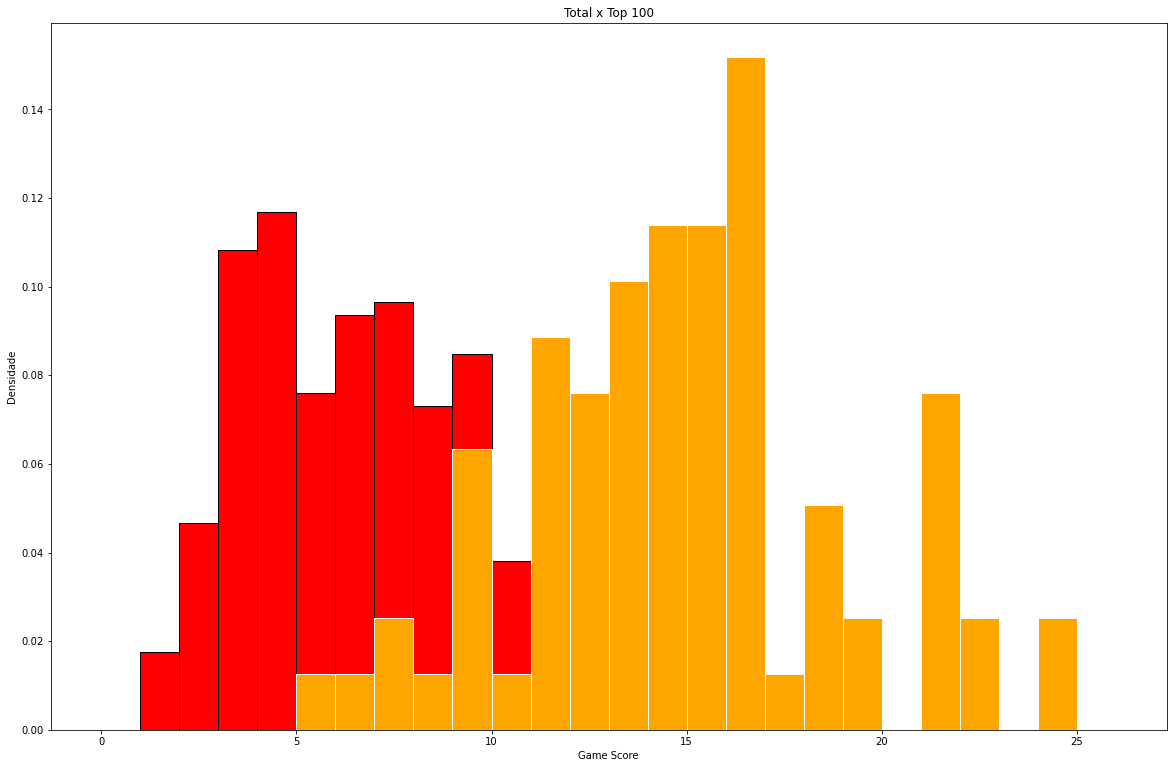

In [546]:
plt.figure(figsize=(20,13))

plt.hist(dados.game_score,bins=np.arange(0,dados.game_score.max(),1),density=1,
         color='red',edgecolor='black')
plt.hist(tier_1.game_score,bins=np.arange(0,dados.game_score.max(),1),density=1,
         color='orange',edgecolor='white')
plt.xlabel('Game Score')
plt.ylabel('Densidade')
plt.title('Total x Top 100')



plt.show()

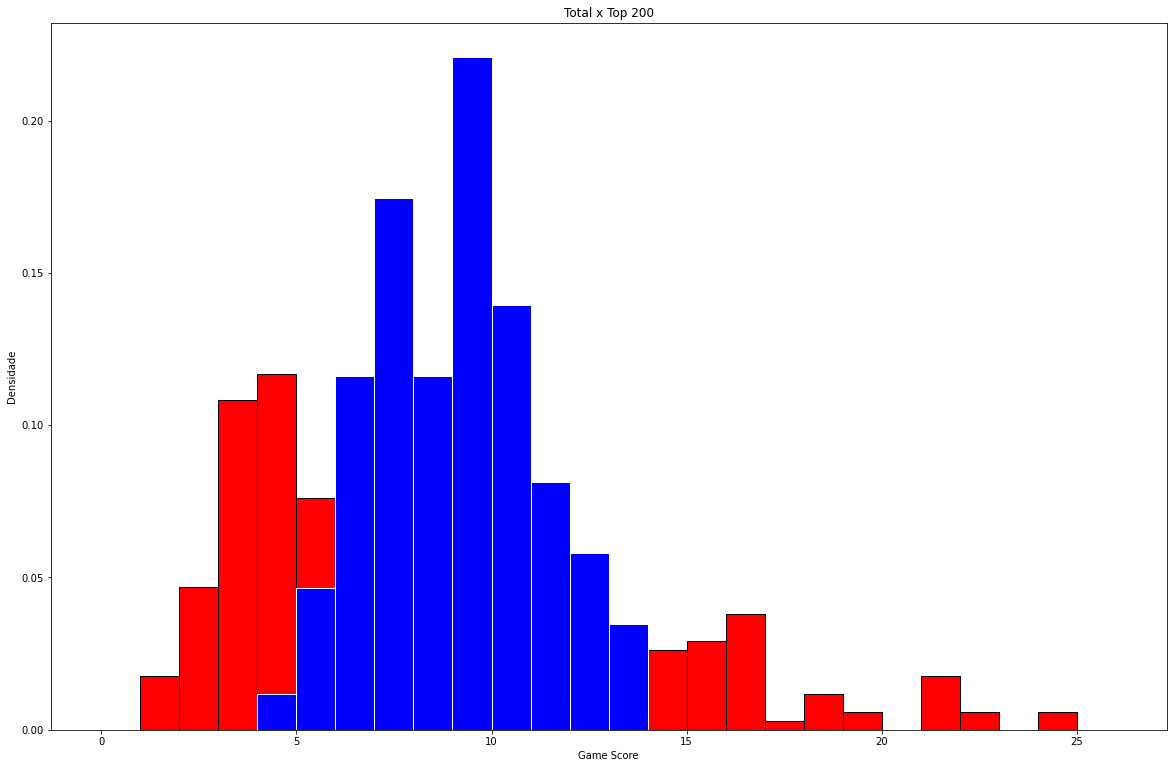

In [547]:
plt.figure(figsize=(20,13))
plt.hist(dados.game_score,bins=np.arange(0,dados.game_score.max(),1),density=1,
         color='red',edgecolor='black')
plt.hist(tier_2.game_score,bins=np.arange(0,dados.game_score.max(),1),density=1,
         color='blue',edgecolor='white')
plt.xlabel('Game Score')
plt.ylabel('Densidade')
plt.title('Total x Top 200')


plt.show()

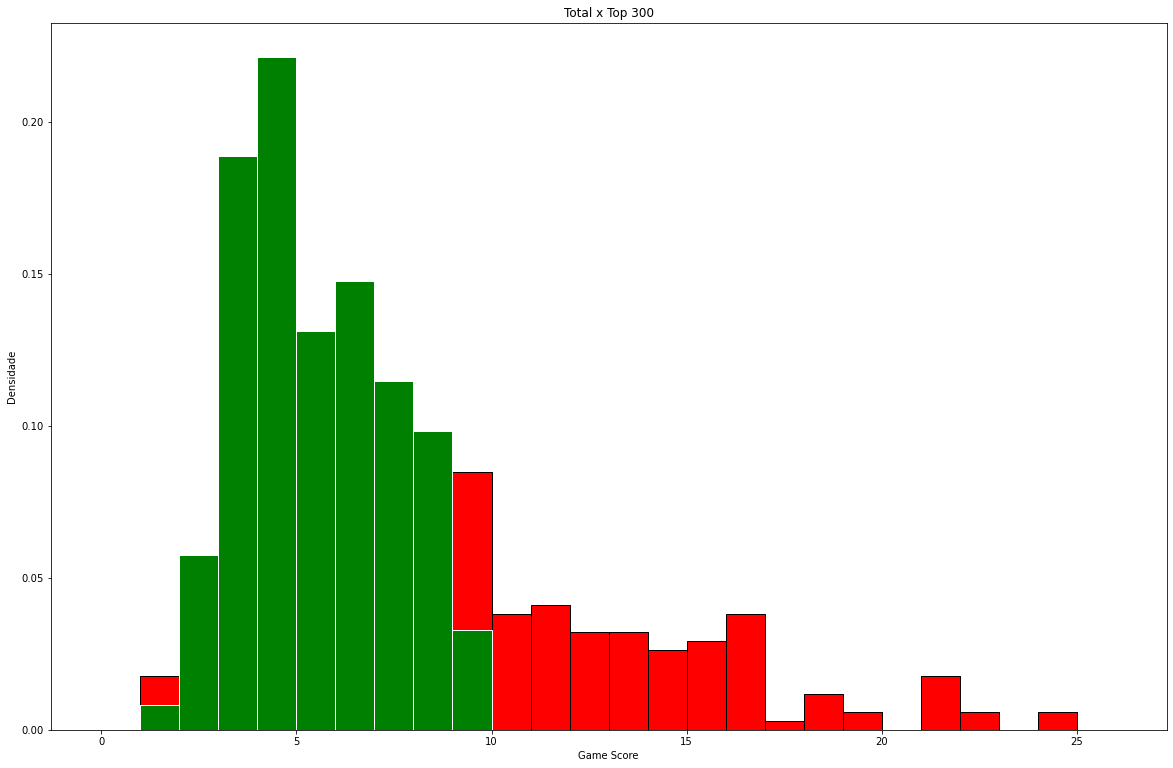

In [548]:
plt.figure(figsize=(20,13))
plt.hist(dados.game_score,bins=np.arange(0,dados.game_score.max(),1),density=1,
         color='red',edgecolor='black')
plt.hist(tier_3.game_score,bins=np.arange(0,dados.game_score.max(),1),density=1,
         color='green',edgecolor='white')
plt.xlabel('Game Score')
plt.ylabel('Densidade')
plt.title('Total x Top 300')


plt.show()

*Pelo primeiro histograma podemos ver que os jogadores do top 100, corroboram para a tese de seu rankeamento, dado que tem game score bem acima do total, ressaltado em vermelho*.

*Para os jogadores entre 100 e 200 pelo ranking da Forbes, nota-se que estes se encontram próximo da mediana dos scores de todos os jogadores somados.*

*Por fim, nota-se que que os jogadores do chamado top 300, estão colocados um pouco abaixo da média, justificando relativamente seu rankeamento de acordo com o Game score*.

## Tentando estimar o Top 100 da temporada 2020-21 com base nas estatísticas base da temporada 2019-20

**Utilizaremos técnicas de Machine Learning para tentar realizar uma predição mais condizente com a realidade, utilizando algum dos parâmetros mais relevantes na análise acima.**

**O modelo para a previsão será uma regressão Logística, que se constitue basicamente por uma função de processamento linear e outra com viés exponencial, analisando com maior precisão a probabilidade de um elemento, de acordo com suas propriedades ser enquadrado em um determinado grupo, no caso desta análise, a qual tier o atleta deve pertencer**

***Utilizaremos, para optimizar o processamento das variáveis, técnicas de validação cruzada do dataset, melhor análise dos hiperparâmetros do modelo, além de normalizar os atributos de entrada para fins de processamento***

In [540]:
scaler=MinMaxScaler()

X=dados[['g','mp','fgpct','efg_pct','ft_pct','trb','ast','stl','blk','pts','game_score']]
y=dados['tier']


log_score_train_max=0
log_score_test_max=0
C=''
this_i=0
for  i in range(100):
    for this_c in np.arange(1,20,1):
        X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=i,
                                                   test_size=0.15)
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        logistic=LogisticRegression(penalty='l2',
                                    C=this_c,
                                    max_iter=1e6).fit(X_train_scaled, y_train)
        if logistic.score(X_test_scaled,y_test)>logistic.score(X_train_scaled,y_train) :
            if logistic.score(X_test_scaled,y_test)>log_score_test_max:
                log_score_train_max=logistic.score(X_train_scaled,y_train)
                log_score_test_max=logistic.score(X_test_scaled,y_test)
                C=this_c
                this_i=i
print(f'O melhor valor para regularização C(regularization) é :{C}.\
Os scores de acurácia no dataset foram:\n\
Treino:\t{log_score_train_max:.3f}\nTeste:\t{log_score_test_max:.3f}')
print(f'O valor de i para validação cruzada é: {this_i}')

O melhor valor para regularização C(regularization) é :13.Os scores de acurácia no dataset foram:
Treino:	0.856
Teste:	0.942
O valor de i para validação cruzada é: 6


In [541]:
#For tier preview
X=dados[['g','mp','fgpct','efg_pct','ft_pct','trb','ast','stl','blk','pts','game_score']]
y_tier=dados['tier']
X_train_tier,X_test_tier,y_train_tier,y_test_tier=train_test_split(X,y_tier,random_state=this_i,
                                                   test_size=0.15)
X_train_scaled_tier = scaler.fit_transform(X_train_tier)
X_test_scaled_tier = scaler.transform(X_test_tier)

logistic_tier=LogisticRegression(penalty='l2',
                            C=C,
                            max_iter=1e6).fit(X_train_scaled_tier, y_train_tier)
logistic_tier.score(X_test_scaled_tier,y_test_tier)

0.9423076923076923

### Padronizando a base de dados 2020-21 e gerando previsões

In [542]:
def change_name(name):
    return name.split('\\')[0]

comp['player']=comp.player.apply(change_name)
comp=comp.fillna(0)
comp['game_score']=comp.pts +0.4*comp.fg -0.7*comp.fga -0.4*(comp.fta-comp.ft)+0.7*comp.orb+0.3*comp.drb +comp.stl+0.7*comp.ast+0.7*comp.blk-0.4*comp.pf-comp.tov

In [543]:
X_t=comp[['g','mp','fgpct','efg_pct','ft_pct','trb','ast','stl','blk','pts','game_score']]
X_t=scaler.fit_transform(X_t)

In [544]:
comp['tier']=logistic_tier.predict(X_t)

In [586]:
top_100_predit=comp[comp.tier==100].sort_values('game_score',ascending=False)
top_100_predit.head(10)

,Player_id,player,pos,age,tm,g,gs,mp,fg,fga,...,drb,trb,ast,stl,blk,tov,pf,pts,game_score,tier
259,260,Nikola Jokic,C,25,DEN,66,66,35.0,10.2,18.1,...,8.1,10.9,8.4,1.4,0.7,3.1,2.7,26.4,25.51,100
11,12,Giannis Antetokounmpo,PF,26,MIL,56,56,33.1,10.3,18.3,...,9.4,11.1,5.9,1.2,1.3,3.6,2.8,28.4,23.97,100
114,115,Stephen Curry,PG,32,GSW,59,59,34.1,10.3,21.3,...,5.1,5.5,5.8,1.2,0.1,3.4,1.9,31.6,23.66,100
144,145,Joel Embiid,C,26,PHI,47,47,31.5,9.2,18.0,...,8.4,10.8,2.9,1.0,1.4,3.1,2.4,29.1,23.62,100
198,199,James Harden,PG-SG,31,TOT,42,42,37.1,8.0,17.2,...,7.2,8.0,10.9,1.2,0.7,4.1,2.3,25.2,22.98,100
128,129,Luka Doncic,PG,21,DAL,60,60,35.1,10.1,20.9,...,7.3,8.1,8.9,1.0,0.6,4.4,2.3,28.5,22.15,100
294,295,Damian Lillard,PG,30,POR,61,61,35.8,8.8,20.0,...,3.7,4.2,7.6,1.0,0.3,3.1,1.6,28.4,21.97,100
138,139,Kevin Durant,PF,32,BRK,30,27,33.2,9.7,18.0,...,6.5,6.9,5.1,0.7,1.2,3.5,2.1,28.0,21.92,100
521,522,Zion Williamson,PF,20,NOP,61,61,33.2,10.4,17.0,...,4.5,7.2,3.7,0.9,0.6,2.7,2.2,27.0,21.75,100
37,38,Bradley Beal,SG,27,WAS,58,58,35.7,11.1,22.8,...,3.5,4.7,4.5,1.2,0.3,3.2,2.3,31.1,21.59,100


#### Comparando com um ranking atual

*Veremos agora se o modelo parece condizente com a realidade comparando com um ranking realizado pela ESPN, disponivel em http://www.espn.com/nba/seasonleaders, para os jogadores na atual temporada, e nisso poderemos averiguar se nosso modelo está parecido com a realidade.*

In [583]:
top_50_espn=pd.read_excel('espn_top100_2021.xlsx',skiprows=1)
top_100_espn=pd.read_excel('espn_top100_2021.xlsx',sheet_name='top50_100',skiprows=1)
top_100_espn=pd.concat([top_50_espn,top_100_espn])
top_100_espn.columns=['RK','PLAYER','TEAM','GP','MPG','FG%','FT%','3PM','RPG',
                      'APG','STPG','BLKPG','TOPG','PTS','ESPN']
top_100_espn.PLAYER=top_100_espn.PLAYER.apply(lambda x: x.split(',')[0])

In [585]:
top_100_espn.head(10)

,RK,PLAYER,TEAM,GP,MPG,FG%,FT%,3PM,RPG,APG,STPG,BLKPG,TOPG,PTS,ESPN
0,1,Nikola Jokic,DEN,68,35.0,.566,.863,1.4,10.8,8.5,1.4,0.7,3.2,26.4,54.4
1,2,Giannis Antetokounmpo,MIL,57,33.0,.564,.688,1.1,11.1,5.9,1.2,1.3,3.6,28.2,51.8
2,3,James Harden,BKN,42,37.1,.463,.870,2.8,8.0,10.9,1.2,0.7,4.1,25.2,50.6
3,4,Luka Doncic,DAL,61,34.9,.483,.723,3.0,8.1,8.7,1.0,0.6,4.4,28.4,50.1
4,5,Stephen Curry,GSW,60,34.0,.487,.916,5.4,5.5,5.7,1.2,0.1,3.3,31.9,49.7
5,6,Joel Embiid,PHI,49,31.4,.516,.860,1.2,10.7,2.9,1.0,1.4,3.1,29.2,48.8
6,7,Kevin Durant,BKN,31,33.5,.541,.881,2.6,7.1,5.2,0.8,1.3,3.5,28.2,47.8
7,8,Russell Westbrook,WAS,61,36.2,.441,.645,1.2,11.6,11.5,1.3,0.4,4.9,22.0,47.7
8,9,LeBron James,LAL,43,33.7,.513,.701,2.3,7.9,7.8,1.0,0.6,3.8,25.0,46.1
9,10,Damian Lillard,POR,63,35.7,.444,.928,4.1,4.2,7.6,1.0,0.3,3.1,28.6,45.9


In [591]:
def compara():
    count=0
    model=top_100_predit.player.tolist()
    espn=top_100_espn.PLAYER.tolist()
    for player in model:
        if player in espn:
            count+=1
        continue
    return count,count/105
compara()

(96, 0.9142857142857143)

**Como pode-se analisar, o modelo parece bem adequado, acertando cerca de 96 jogadores no ranking de 105 descritos pelo modelo como capazes de integrar esse time. É valido se destacar que o modelo também parece bem coerente para com a escolha do melhor jogador, isto é, o MVP, sendo este Nikola Jokic, e também acertando boa parte dos jogadores colocados no chamado top 10.**

### Referências
- Top 100 Forbes da NBA 2019-20: 
https://www.forbes.com/sites/andybailey/2020/03/21/giannis-lebron-and-the-top-100-players-of-the-2019-2020-nba-season/?sh=546cde3f19e0 
e
https://docs.google.com/spreadsheets/d/1BK3kBKnnIm55BnopeF0Z_JM7htiBMaau9Y35_07XIoM/edit#gid=488413399



- Top 100 atual ESPN 2020-21:
http://www.espn.com/nba/seasonleaders